This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000) 

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers


model = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005),activation="tanh"),
    layers.Dense(64,activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64,activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])


In [10]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers


model = keras.Sequential([
    layers.Dense(32,kernel_regularizer=regularizers.l2(0.005),activation="tanh"),
    layers.Dense(32,activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(32,activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])


**Compiling the model**

In [11]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.6595 - loss: 0.4482 - val_accuracy: 0.8314 - val_loss: 0.2239
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8547 - loss: 0.1979 - val_accuracy: 0.8184 - val_loss: 0.1864
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8728 - loss: 0.1455 - val_accuracy: 0.8792 - val_loss: 0.1318
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9055 - loss: 0.1166 - val_accuracy: 0.8584 - val_loss: 0.1454
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9105 - loss: 0.1092 - val_accuracy: 0.8698 - val_loss: 0.1326
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8982 - loss: 0.1163 - val_accuracy: 0.8281 - val_loss: 0.1671
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8979 - loss: 0.1160 - val_accuracy: 0.8589 - val_loss: 0.1418
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9167 - loss: 0.1021 - val_accuracy: 0.8756 - 

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

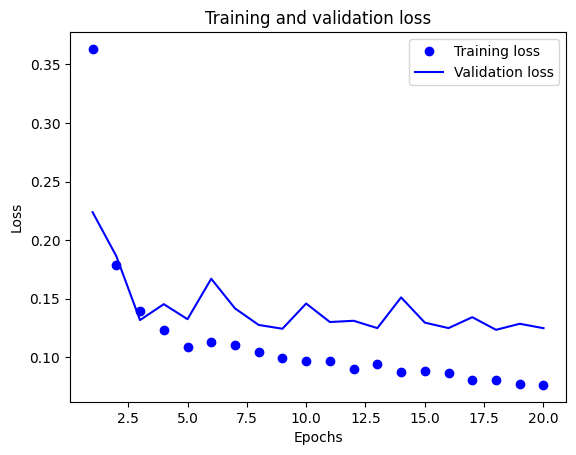

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

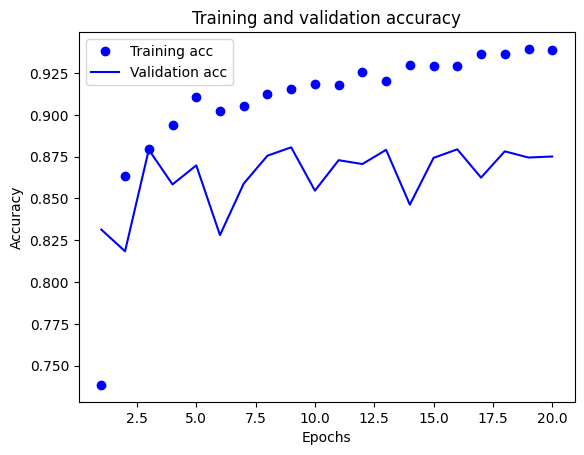

In [16]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [17]:
results = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8675 - loss: 0.1315


In [18]:
results

[0.13068531453609467, 0.8679199814796448]

**Retraining a model from scratch**

In [19]:
model = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005),activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


model = keras.Sequential([
    layers.Dense(32,kernel_regularizer=regularizers.l2(0.005),activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)



Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7129 - loss: 0.5323
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8965 - loss: 0.1556
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9068 - loss: 0.1438
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9061 - loss: 0.1435
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8753 - loss: 0.1611
Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6581 - loss: 0.3989
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8880 - loss: 0.1440
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9086 - loss: 0.1251
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9111 - loss: 0.1278
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8700 - loss: 0.1550


In [20]:
model = keras.Sequential([
    layers.Dense(32,kernel_regularizer=regularizers.l2(0.005),activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6318 - loss: 0.4034
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8886 - loss: 0.1417
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9072 - loss: 0.1252
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9064 - loss: 0.1296
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8762 - loss: 0.1510


In [21]:
results

[0.14957207441329956, 0.8776000142097473]